In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import plotly.graph_objects as go
import geopandas as gpd


In [3]:
# Creating path to the csv file
trends_csv = Path("shopping_trends.csv")

# Reading CSV file as DataFrame
trends_df = pd.read_csv(trends_csv)
trends_df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
# Describing DataFrame
trends_df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [5]:
# Checking columns and data. It shows that there are no missing data and no null value
trends_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [6]:
# Define colors for visualizaiton
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']

# Checking the gender count
gender_count = trends_df['Gender'].value_counts()

fig = go.Figure(data=[go.Pie(labels=trends_df['Gender'].unique(), 
                             values=gender_count, hole=0.6)]
                            )
# Set colors for each slice
fig.update_traces(marker=dict(colors=colors))

# Setting layout options
fig.update_layout(title='Purchase by Gender', title_x=0.46)

# Show the plot
fig.show()

# Males are the most amount of purchases - 68% as compared to Female only at 32%   

In [15]:
# Checking the gender count
payment_method = trends_df['Payment Method'].value_counts()

fig = go.Figure(data=[go.Pie(labels=trends_df['Payment Method'].unique(), 
                             values=payment_method, hole=0.5)]
                            )
# Set colors for each slice
fig.update_traces(marker=dict(colors=colors))

# Setting layout options
fig.update_layout(title='Payment Method', title_x=0.46)

# Show the plot
fig.show()

<Figure size 640x480 with 0 Axes>

# Payment Method by Percentage

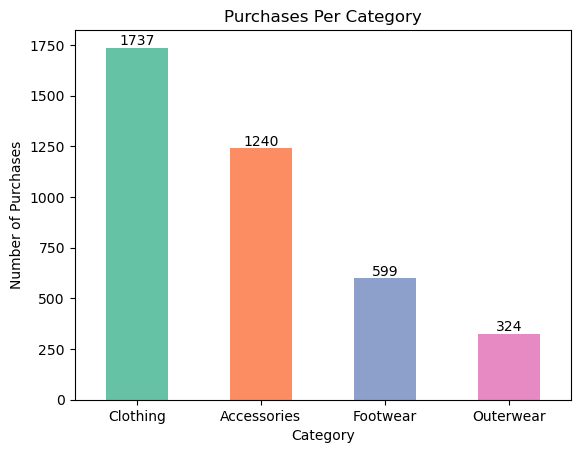

In [12]:
# Sales per category
category_sale = trends_df['Category'].value_counts()

category_sale.plot(kind='bar',
                   xlabel='Category',
                   ylabel='Number of Purchases',
                   legend=False,
                   title='Purchases Per Category',
                   color = colors,
                   )

# Annotate each bar with its count
for i, count in enumerate(category_sale):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xticks(rotation=0)

plt.savefig("Purchase Per Category", bbox_inches="tight")

plt.show()


# Clothing is the most popular Category for shoppers followed by Accessoires, Footwear and least with Outerwear

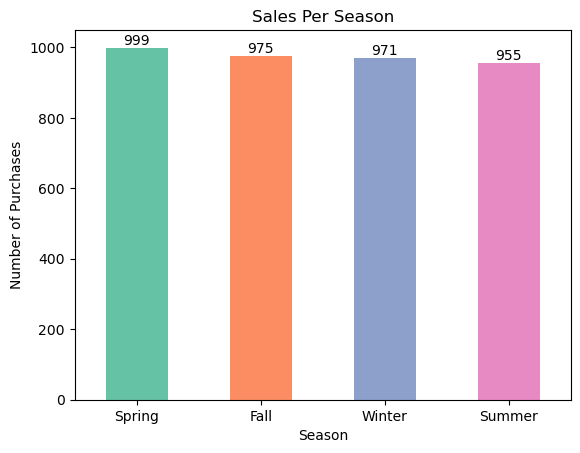

In [13]:
season_sale = trends_df['Season'].value_counts()

season_sale.plot(kind='bar',
                 title='Sales Per Season',
                 ylabel='Number of Purchases',
                 color=colors,
                 )

# Annotate each bar with its count
for i, count in enumerate(season_sale):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xticks(rotation = 0)

plt.savefig("Sales Per Season", bbox_inches="tight")

plt.show()

# Sales are pretty consistent all around the year with all 4 seasons

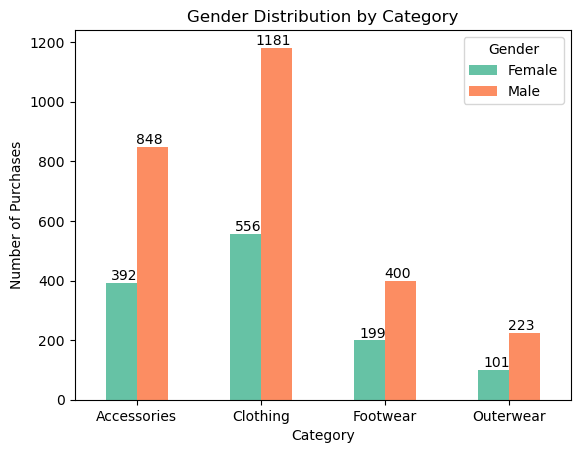

In [14]:
# Group by 'Category' and 'Gender' and count occurrences
category_gender_sale = trends_df.groupby(['Category', 'Gender']).size().unstack()

# Plotting the bar chart
category_gender_sale.plot(kind='bar',
                          stacked=False,
                          title='Gender Distribution by Category',
                          xlabel='Category',
                          ylabel='Number of Purchases',
                          color=colors,
                          )

# Annotate each bar with its count
for i, category in enumerate(category_gender_sale.index):
    for j, gender in enumerate(category_gender_sale.columns):
        count = category_gender_sale.loc[category, gender]
       
        # Calculate the x-coordinate for the annotation
        x = i + j * 0.2 - 0.1 * (len(category_gender_sale.columns) - 1)
        plt.text(x, count, str(count), ha='center', va='bottom', color='black')

# Customizing the plot
plt.xticks(rotation=0) 
plt.legend(title='Gender')

# Saving png
plt.savefig("Gender Distribution by Category", bbox_inches="tight")

# Show the plot
plt.show()

# Sales by Gender in each Category